<h1>Loading Data</h1>

In [1]:
import numpy as np
import os
import pandas as pd
cwd = os.getcwd()

In [2]:
filepath = f"{cwd}\\wwlLancMsc_data\\wwlLancMsc_data.csv"
data_csv = pd.read_csv(filepath)
data_csv.head()

C:\Users\OMNI BOOK\AppData\Local\Temp\ipykernel_4308\3578696473.py:2: DtypeWarning: Columns (58) have mixed types. Specify dtype option on import or set low_memory=False.
  data_csv = pd.read_csv(filepath)


,site_national_code,site_description,site_local_code,Admission_Date,admission_date_dt,discharge_date_dt,specialty_local_code,specialty_spec_code,specialty_spec_desc,ward_code_admission,...,source_of_ref_description,presenting_complaint,acuity_code,inj_or_ail,NEWS2,attend_dis_description,ae_unplanned_attendance,location,ID,Deprivation Decile
0,RRF01,LEIGH INFIRMARY,LEI,7/15/2023,15/07/2023 13:57:00,15/07/2023 16:00:00,CREC,104,Colorectal Surgery,GAST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49591,3
1,RRF53,WRIGHTINGTON HOSPITAL,WNT,7/5/2023,5/7/2023 8:37,5/7/2023 10:08,TO,110,Trauma & Orthopaedics,OAU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25760,10
2,RRF02,ROYAL ALBERT EDWARD INFIRMARY,RAEI,6/8/2023,8/6/2023 11:45,8/6/2023 12:50,GS,100,General Surgery,SAEC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,159753,3
3,RRF53,WRIGHTINGTON HOSPITAL,WNT,6/8/2023,8/6/2023 7:13,8/6/2023 17:35,BS,103,Breast Surgery,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76679,4
4,RRF02,ROYAL ALBERT EDWARD INFIRMARY,RAEI,6/8/2023,8/6/2023 8:29,8/6/2023 15:34,GA,301,Gastroenterology,ENDO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2617,9


<h1>Data Pre-Processing<h1>

<P>Identifying Shape and Column Data Types

In [3]:
print(f"Rows = {data_csv.shape[0]}\ncolumns = {data_csv.shape[1]}")

Rows = 41846
columns = 101


In [6]:
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41846 entries, 0 to 41845
Columns: 101 entries, site_national_code to Deprivation Decile
dtypes: float64(8), int64(48), object(45)
memory usage: 32.2+ MB


In [8]:
data_csv.describe()

,specialty_spec_code,duration_elective_wait,patient_age_on_admission,patient_age_on_discharge,spell_episode_los,discharge_delay_reason_national_code,delayed_discharges_flag,delayed_discharges_no_of_days,readmission_flag_28_days,readmission_flag_30_days,...,chronic_condition_diabetes_flag,chronic_condition_cardiovascular_disease_flag,chronic_condition_hypertension_flag,chronic_condition_obesity_flag,chronic_condition_respiratory_flag,acuity_code,NEWS2,ae_unplanned_attendance,ID,Deprivation Decile
count,41846.000000,17295.000000,41846.000000,41846.000000,41846.000000,0.0,41846.000000,41846.000000,41846.000000,41846.000000,...,41846.00000,41846.000000,41846.000000,41846.000000,41846.000000,11017.000000,9750.000000,11464.0,41846.000000,41846.000000
mean,244.584668,105.389303,56.907470,56.912274,1.759427,NaN,0.000048,0.000406,0.192993,0.198657,...,0.13392,0.413397,0.293624,0.128949,0.111624,2.744849,1.818564,1.0,87398.334273,4.816781
std,118.221109,172.722877,23.284725,23.287412,5.281628,NaN,0.006913,0.069992,0.394653,0.398994,...,0.34057,0.492449,0.455427,0.335147,0.314907,0.623447,2.387784,0.0,50524.386801,2.993522
min,100.000000,0.000000,1.000000,1.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,3.000000,1.000000
25%,110.000000,18.000000,41.000000,41.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.0,43528.750000,2.000000
50%,300.000000,49.000000,62.000000,62.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.0,86992.500000,4.000000
75%,301.000000,132.000000,75.000000,75.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,0.00000,1.000000,1.000000,0.000000,0.000000,3.000000,3.000000,1.0,131240.250000,8.000000
max,560.000000,3415.000000,104.000000,104.000000,123.000000,NaN,1.000000,14.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,5.000000,17.000000,1.0,174728.000000,10.000000


<h3> <b>Distribution Analysis 

In [5]:
numeric_data_types = data_csv.select_dtypes(include=np.number)
numeric_data_types

,specialty_spec_code,duration_elective_wait,patient_age_on_admission,patient_age_on_discharge,spell_episode_los,discharge_delay_reason_national_code,delayed_discharges_flag,delayed_discharges_no_of_days,readmission_flag_28_days,readmission_flag_30_days,...,chronic_condition_diabetes_flag,chronic_condition_cardiovascular_disease_flag,chronic_condition_hypertension_flag,chronic_condition_obesity_flag,chronic_condition_respiratory_flag,acuity_code,NEWS2,ae_unplanned_attendance,ID,Deprivation Decile
0,104,277.0,76,76,0,NaN,0,0,0,0,...,0,1,1,0,0,NaN,NaN,NaN,49591,3
1,110,130.0,66,66,0,NaN,0,0,0,0,...,1,1,1,0,0,NaN,NaN,NaN,25760,10
2,100,NaN,48,48,0,NaN,0,0,1,1,...,0,1,1,0,0,NaN,NaN,NaN,159753,3
3,103,22.0,49,49,0,NaN,0,0,0,0,...,0,1,1,0,0,NaN,NaN,NaN,76679,4
4,301,64.0,61,61,0,NaN,0,0,0,0,...,0,0,0,0,0,NaN,NaN,NaN,2617,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41841,110,92.0,67,67,0,NaN,0,0,0,0,...,0,0,0,0,0,NaN,NaN,NaN,77783,4
41842,300,NaN,52,52,0,NaN,0,0,0,0,...,0,0,0,0,0,2.0,0.0,1.0,90325,2
41843,101,46.0,38,38,0,NaN,0,0,0,0,...,0,0,0,0,0,NaN,NaN,NaN,106774,6
41844,110,NaN,21,21,0,NaN,0,0,0,0,...,0,0,0,0,0,NaN,NaN,NaN,3114,3


In [6]:
numeric_data_types.describe()

,specialty_spec_code,duration_elective_wait,patient_age_on_admission,patient_age_on_discharge,spell_episode_los,discharge_delay_reason_national_code,delayed_discharges_flag,delayed_discharges_no_of_days,readmission_flag_28_days,readmission_flag_30_days,...,chronic_condition_diabetes_flag,chronic_condition_cardiovascular_disease_flag,chronic_condition_hypertension_flag,chronic_condition_obesity_flag,chronic_condition_respiratory_flag,acuity_code,NEWS2,ae_unplanned_attendance,ID,Deprivation Decile
count,41846.000000,17295.000000,41846.000000,41846.000000,41846.000000,0.0,41846.000000,41846.000000,41846.000000,41846.000000,...,41846.00000,41846.000000,41846.000000,41846.000000,41846.000000,11017.000000,9750.000000,11464.0,41846.000000,41846.000000
mean,244.584668,105.389303,56.907470,56.912274,1.759427,NaN,0.000048,0.000406,0.192993,0.198657,...,0.13392,0.413397,0.293624,0.128949,0.111624,2.744849,1.818564,1.0,87398.334273,4.816781
std,118.221109,172.722877,23.284725,23.287412,5.281628,NaN,0.006913,0.069992,0.394653,0.398994,...,0.34057,0.492449,0.455427,0.335147,0.314907,0.623447,2.387784,0.0,50524.386801,2.993522
min,100.000000,0.000000,1.000000,1.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,3.000000,1.000000
25%,110.000000,18.000000,41.000000,41.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.0,43528.750000,2.000000
50%,300.000000,49.000000,62.000000,62.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.0,86992.500000,4.000000
75%,301.000000,132.000000,75.000000,75.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,0.00000,1.000000,1.000000,0.000000,0.000000,3.000000,3.000000,1.0,131240.250000,8.000000
max,560.000000,3415.000000,104.000000,104.000000,123.000000,NaN,1.000000,14.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,5.000000,17.000000,1.0,174728.000000,10.000000


In [7]:
#getting columns with null values
numeric_data_types.isnull().sum()[numeric_data_types.isnull().sum()>0] 

duration_elective_wait                  24551
discharge_delay_reason_national_code    41846
social_worker_date_time_referred        41846
discharge_letter_sent_in_24hrs          17283
covid19_diagnosis_flag                  41695
acuity_code                             30829
NEWS2                                   32096
ae_unplanned_attendance                 30382
dtype: int64

Percentage of Missing Values

In [8]:
print("Numerical Missing Value Columns and their Percentages")
print(f"{(numeric_data_types.isnull().sum()[numeric_data_types.isnull().sum()>0] / data_csv.shape[0]) *100}")

Numerical Missing Value Columns and their Percentages
duration_elective_wait                   58.669885
discharge_delay_reason_national_code    100.000000
social_worker_date_time_referred        100.000000
discharge_letter_sent_in_24hrs           41.301439
covid19_diagnosis_flag                   99.639153
acuity_code                              73.672514
NEWS2                                    76.700282
ae_unplanned_attendance                  72.604311
dtype: float64


<p> Histograms for Empty Continous Columns<p>

In [16]:
import matplotlib.pyplot as plt

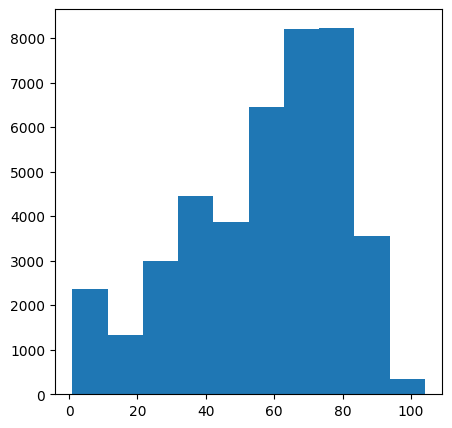

In [ ]:
plt.figure(figsize=(5,5))
plt.hist(label="Histogram 1",x=numeric_data_types_nona['patient_age_on_admission'])
plt.show()

Handling Missing Values

In [10]:
null_values = 

SyntaxError: invalid syntax (4185586508.py, line 1)

In [ ]:
data_csv.